In [1]:
from glob import glob
from grape import GraphVisualizer

node_path = glob("../data/merged/merged-kg_nodes.tsv", recursive=True)[0]
edge_path = glob("../data/merged/merged-kg_edges.tsv", recursive=True)[0]

/Users/marcin/Documents/VIMSS/ontology/KG-Hub/KG-Microbe/kg-microbe/notebooks/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
!pip install graphviz

In [ ]:
#either run THIS ... or ... the cell BELOW!

#from grape.datasets.kghub import KGMicrobe

#kg_microbe = KGMicrobe()

In [2]:
from grape import Graph

kg_microbe = Graph.from_csv(
    # Edges related parameters

    ## The path to the edges list tsv
    edge_path=edge_path,
    ## Set the tab as the separator between values
    edge_list_separator="\t",
    ## The first rows should NOT be used as the columns names
    edge_list_header=True,
    ## The source nodes are in the first nodes
    sources_column="subject",
    #sources_column_number=1,
    ## The destination nodes are in the second column
    destinations_column="object",
    #destinations_column_number=4,
    ## Both source and destinations columns use numeric node_ids instead of node names
    edge_list_numeric_node_ids=False,
    ## The weights are in the third column
    weights_column_number=None,

    #edge_type_path=edge_path,
    edge_list_edge_types_column="predicate",    

    # Nodes related parameters
    ## The path to the nodes list tsv
    node_path=node_path,
    ## Set the tab as the separator between values
    node_list_separator="\t",
    ## The first rows should be used as the columns names
    node_list_header=True,
    ## The column with the node names is the one with name "node_name".
    nodes_column="id",
    #nodes_column_number=1,

    #node_type_path=node_path,
    node_list_node_types_column="category",
    
    # Graph related parameters
    ## The graph is undirected
    directed=False,
    ## The name of the graph is HomoSapiens
    name="kg_microbe",
    ## Display a progress bar, (this might be in the terminal and not in the notebook)
    verbose=True,
)

In [3]:
kg_microbe

<div class="graph-report"><style>.graph-report li {margin: 0.5em 0 0.5em 0;}.graph-report .paragraph {text-align: justify;word-break: break-all;}.graph-report .small-columns {column-count: 4;column-gap: 2em;}.graph-report .medium-columns {column-count: 3;column-gap: 2em;}.graph-report .large-columns {column-count: 2;column-gap: 2em;}.graph-report .single-column {}@media only screen and (max-width: 600px) {.graph-report .small-columns {column-count: 1;}.graph-report .medium-columns {column-count: 1;}.graph-report .large-columns {column-count: 1;}}@media only screen and (min-width: 600px) and (max-width: 800px) {.graph-report .small-columns {column-count: 2;}.graph-report .medium-columns {column-count: 1;}.graph-report .large-columns {column-count: 1;}}@media only screen and (min-width: 800px) and (max-width: 1024px) {.graph-report .small-columns {column-count: 3;}.graph-report .medium-columns {column-count: 2;}.graph-report .large-columns {column-count: 1;}}</style><h2>kg_microbe</h2><p class="paragraph">The undirected multigraph kg_microbe has 1.07M heterogeneous nodes and 1.45M heterogeneous edges. The graph contains 28.03K connected components (of which 27.83K are disconnected nodes), with the largest one containing 1.04M nodes and the smallest one containing a single node. The RAM requirements for the nodes and edges data structures are 131.90MB and 20.16MB respectively.</p><h3 style="margin: 1em 0 0 0;">Degree centrality</h3><p class="paragraph">The minimum node degree is 0, the maximum node degree is 33.70K, the mode degree is 1, the mean degree is 2.72 and the node degree median is 1.</p><p class="paragraph">The nodes with the highest degree centrality are <a href='https://www.ncbi.nlm.nih.gov/taxonomy/?term=49928' target='_blank' title='Go to NCBI Taxonomy to get more informations about NCBITaxon:49928'>NCBITaxon:49928</a> (degree 33.70K and node type <a href='https://biolink.github.io/biolink-model/docs/OrganismTaxon.html' target='_blank' title='Go to BioLink to get more informations about biolink:OrganismTaxon'>biolink:OrganismTaxon</a>), <a href='https://www.ncbi.nlm.nih.gov/taxonomy/?term=185979' target='_blank' title='Go to NCBI Taxonomy to get more informations about NCBITaxon:185979'>NCBITaxon:185979</a> (degree 30.02K and node type <a href='https://biolink.github.io/biolink-model/docs/OrganismTaxon.html' target='_blank' title='Go to BioLink to get more informations about biolink:OrganismTaxon'>biolink:OrganismTaxon</a>), <a href='https://www.ncbi.nlm.nih.gov/taxonomy/?term=196821' target='_blank' title='Go to NCBI Taxonomy to get more informations about NCBITaxon:196821'>NCBITaxon:196821</a> (degree 27.61K and node type <a href='https://biolink.github.io/biolink-model/docs/OrganismTaxon.html' target='_blank' title='Go to BioLink to get more informations about biolink:OrganismTaxon'>biolink:OrganismTaxon</a>), <a href='https://www.ncbi.nlm.nih.gov/taxonomy/?term=48479' target='_blank' title='Go to NCBI Taxonomy to get more informations about NCBITaxon:48479'>NCBITaxon:48479</a> (degree 24.11K and node type <a href='https://biolink.github.io/biolink-model/docs/OrganismTaxon.html' target='_blank' title='Go to BioLink to get more informations about biolink:OrganismTaxon'>biolink:OrganismTaxon</a>) and <a href='https://www.ncbi.nlm.nih.gov/taxonomy/?term=2593676' target='_blank' title='Go to NCBI Taxonomy to get more informations about NCBITaxon:2593676'>NCBITaxon:2593676</a> (degree 22.06K and node type <a href='https://biolink.github.io/biolink-model/docs/OrganismTaxon.html' target='_blank' title='Go to BioLink to get more informations about biolink:OrganismTaxon'>biolink:OrganismTaxon</a>).</p><h3 style="margin: 1em 0 0 0;">Node types</h3><p class="paragraph">The graph has 19 node types, of which the 10 most common are <a href='https://biolink.github.io/biolink-model/docs/OrganismTaxon.html' target='_blank' title='Go to BioLink to get more informations about biolink:OrganismTaxon'>biolink:OrganismTaxon</a> (815.97

In [ ]:
%%time

###
###UNTESTED code for a multithread timer, maybe note for nb
###
import time
import threading

def elapsed_time_counter(interval):
    start_time = time.time()
    while True:
        current_time = time.time()
        elapsed_time = current_time - start_time
        print(f"{elapsed_time:.2f} seconds")
        time.sleep(interval)
        
interval = 60  # Update every X second

# Create a thread for the elapsed time counter
counter_thread = threading.Thread(target=elapsed_time_counter, args=(interval,))
counter_thread.start()



In [ ]:
#add code to remove singletons from kg-hub example
#save new edges file or at least pickle kg_microbe

In [4]:
!date

Tue Nov 14 18:00:01 PST 2023


In [ ]:
%%time

import pickle
import datetime
from grape.embedders import Node2VecSkipGramEnsmallen#fastnode2vec_embedders

model = Node2VecSkipGramEnsmallen()

Node2VecSkipGramEnsmallen_embedding = model.fit_transform(kg_microbe)


In [ ]:

current_datetime = datetime.datetime.now()
formatted_date = current_datetime.strftime("%Y-%m-%d_%H_%M_%S")

with open('Node2VecSkipGramEnsmallen_embedding_'+formatted_date+'.pkl', 'wb') as file:
    # Use the 'wb' mode to write in binary mode
    pickle.dump(Node2VecSkipGramEnsmallen_embedding, file)


In [5]:
#read from pickle
import pickle

pickle_filename = 'Node2VecSkipGramEnsmallen_embedding_2023-11-15_23_09_38.pkl'

with open(pickle_filename, 'rb') as file:
    # Use the 'rb' mode to read in binary mode
    Node2VecSkipGramEnsmallen_embedding = pickle.load(file)

/Users/marcin/Documents/VIMSS/ontology/KG-Hub/KG-Microbe/kg-microbe/notebooks/venv/lib/python3.10/site-packages/pydantic/_internal/_config.py:317: UserWarning: Valid config keys have changed in V2:
* 'underscore_attrs_are_private' has been removed
  warnings.warn(message, UserWarning)


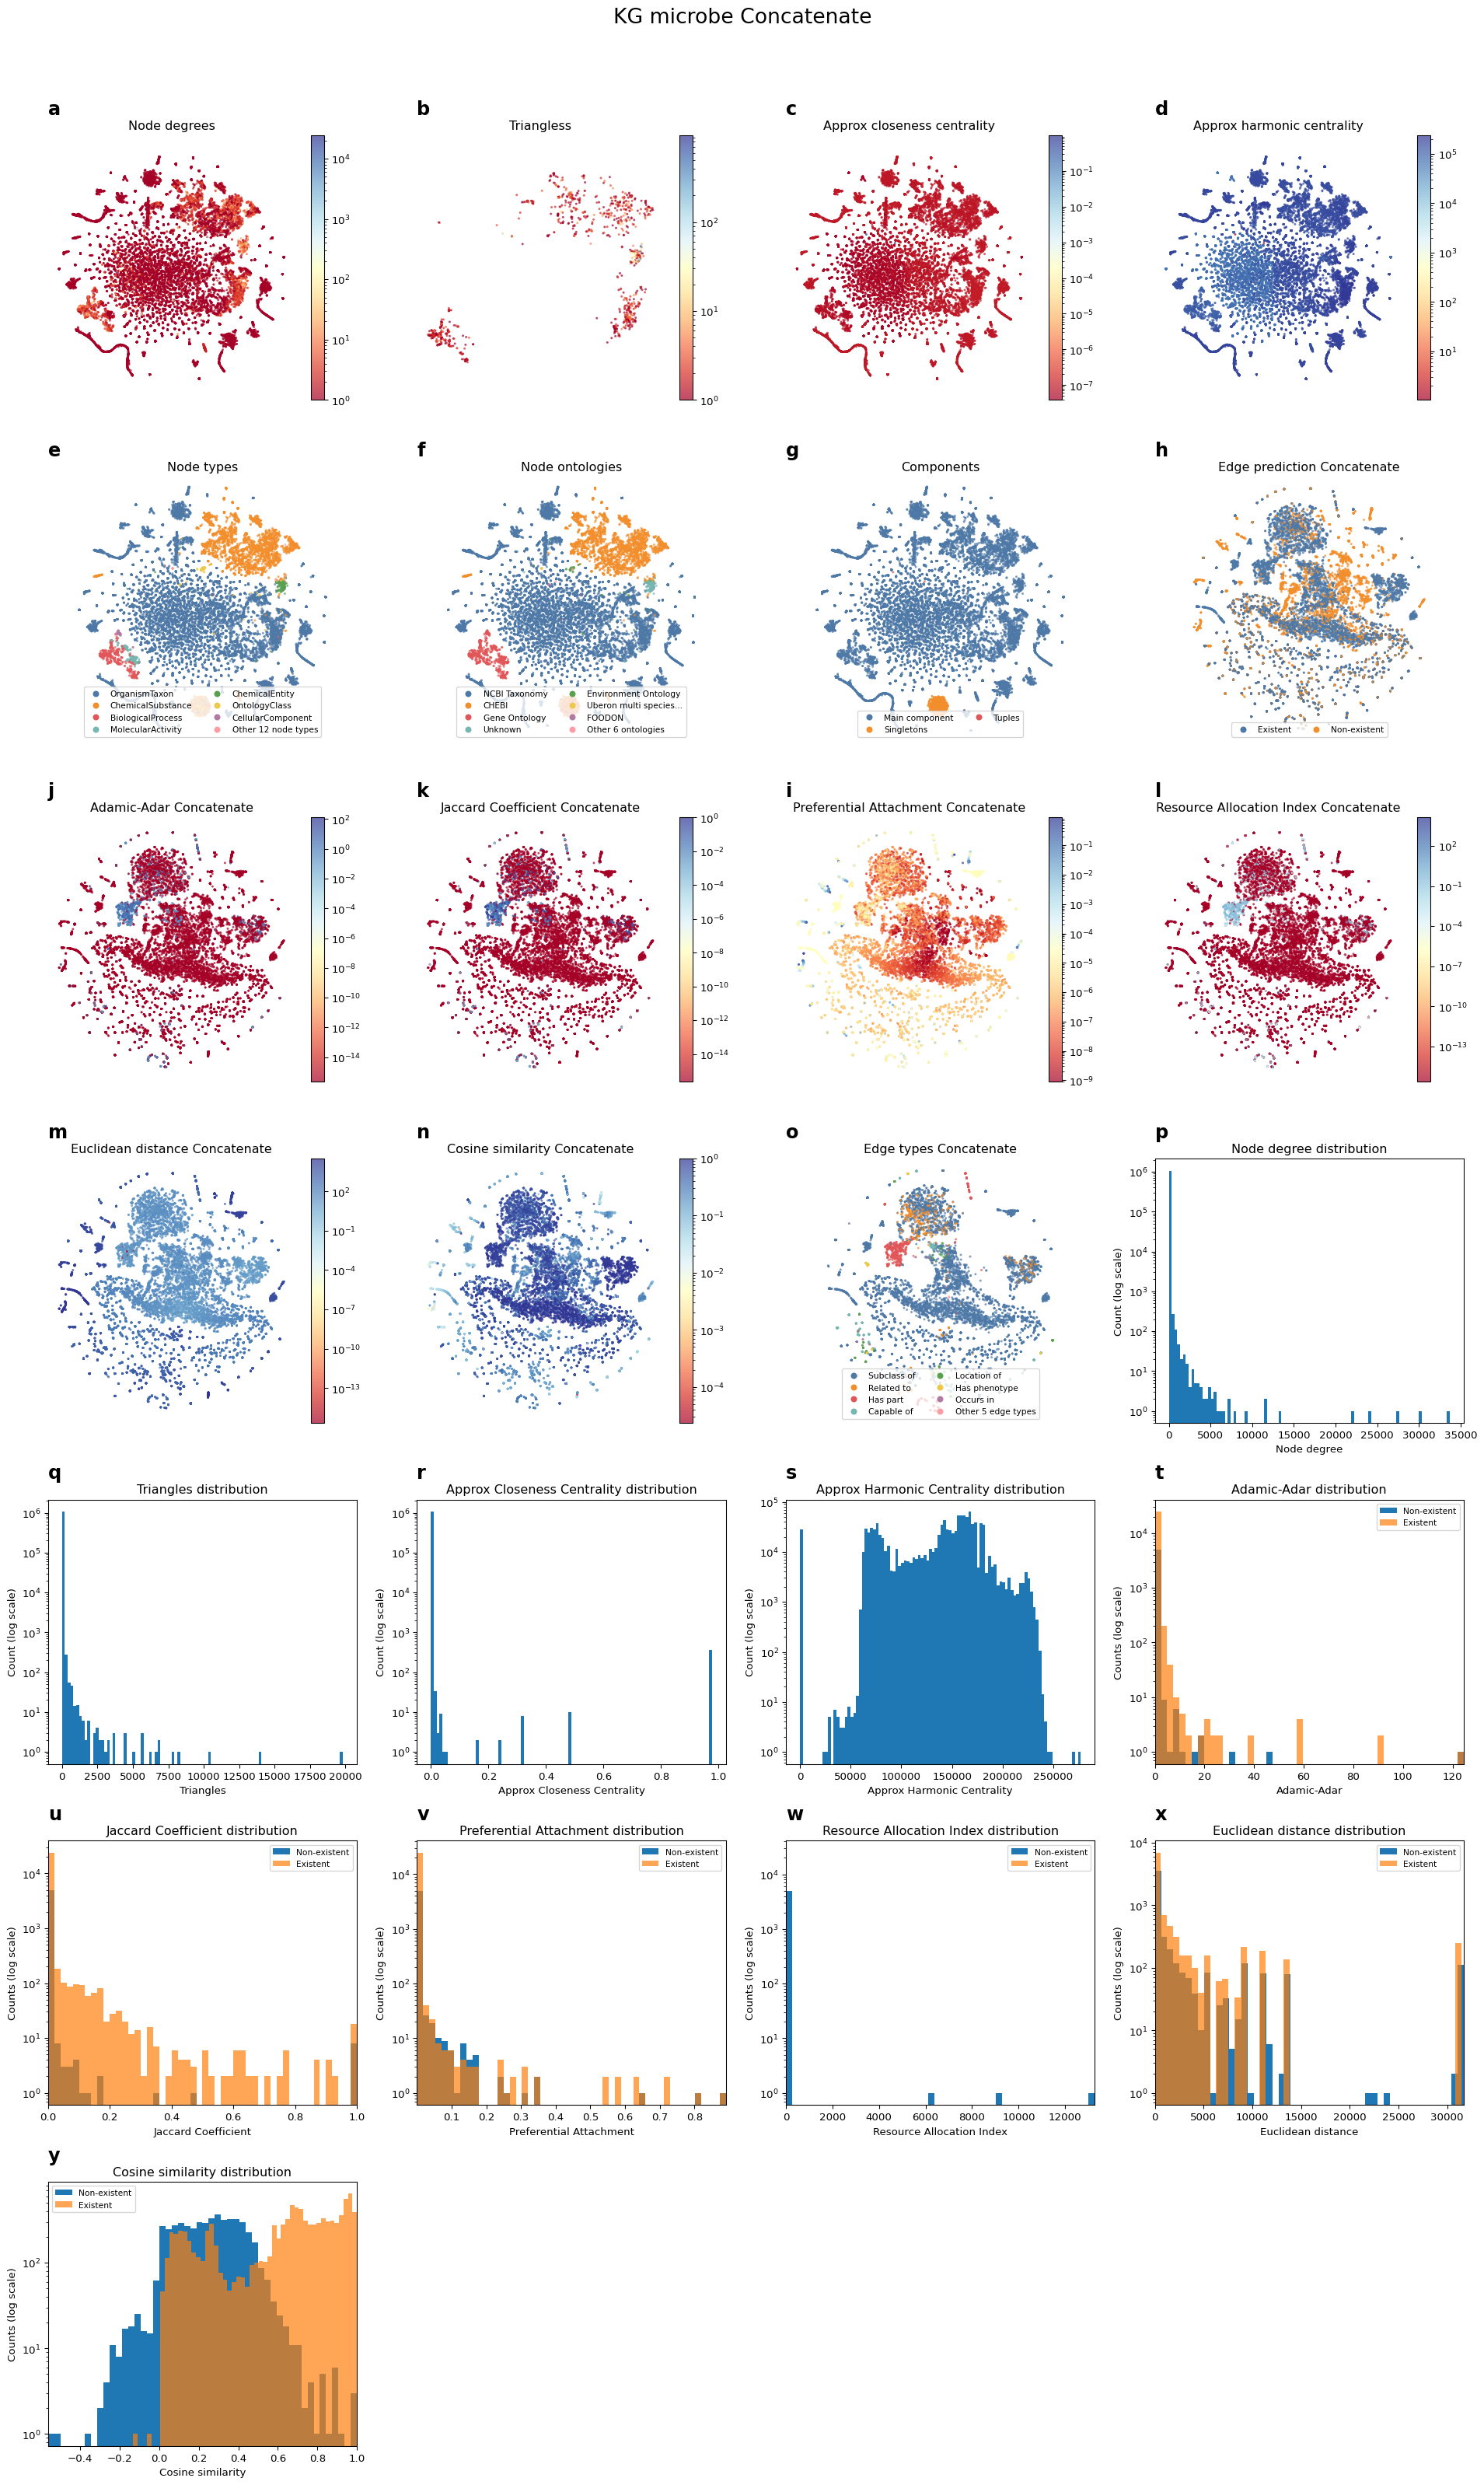

In [6]:
GraphVisualizer(kg_microbe).fit_and_plot_all(Node2VecSkipGramEnsmallen_embedding)

In [7]:
vis = GraphVisualizer(
    graph=kg_microbe,
    n_components=4,
    #edge_embedding_method="Hadamard",
    rotate=True,
    verbose=True,
    # Automatically, since GloVe learns a cosine, the visualization tool
    # would dispatch a Cosine-distance based TSNE. This would use the sklearn
    # implementation, which is terribly slow. Therefore, we force it to use the Euclidean distance
    # and therefore the Multicore TSNE implementation (when available).
    decomposition_kwargs=dict(metric="euclidean")
)


In [8]:
%%time
vis.fit_nodes(Node2VecSkipGramEnsmallen_embedding)

[t-SNE] Computing pairwise distances...
[t-SNE] Computed conditional probabilities for sample 1000 / 20000
[t-SNE] Computed conditional probabilities for sample 2000 / 20000
[t-SNE] Computed conditional probabilities for sample 3000 / 20000
[t-SNE] Computed conditional probabilities for sample 4000 / 20000
[t-SNE] Computed conditional probabilities for sample 5000 / 20000
[t-SNE] Computed conditional probabilities for sample 6000 / 20000
[t-SNE] Computed conditional probabilities for sample 7000 / 20000
[t-SNE] Computed conditional probabilities for sample 8000 / 20000
[t-SNE] Computed conditional probabilities for sample 9000 / 20000
[t-SNE] Computed conditional probabilities for sample 10000 / 20000
[t-SNE] Computed conditional probabilities for sample 11000 / 20000
[t-SNE] Computed conditional probabilities for sample 12000 / 20000
[t-SNE] Computed conditional probabilities for sample 13000 / 20000
[t-SNE] Computed conditional probabilities for sample 14000 / 20000
[t-SNE] Computed 

In [9]:
%%time
vis.plot_connected_components()

Rendering:   0%|                                                                               | 0/240 [00:00<?, ?it/s]OpenCV: FFMPEG: tag 0x30387076/'vp80' is not supported with codec id 139 and format 'webm / WebM'
                                                                                                                       

CPU times: user 3min 18s, sys: 7min 24s, total: 10min 43s
Wall time: 1min 29s


In [10]:
vis.plot_node_ontologies()

Rendering:   0%|                                                                               | 0/240 [00:00<?, ?it/s]OpenCV: FFMPEG: tag 0x30387076/'vp80' is not supported with codec id 139 and format 'webm / WebM'


TypeError: cannot unpack non-iterable HTML object

In [11]:
vis.plot_approximated_closeness_centrality()

Rendering:   0%|                                                                               | 0/240 [00:00<?, ?it/s]OpenCV: FFMPEG: tag 0x30387076/'vp80' is not supported with codec id 139 and format 'webm / WebM'


In [12]:
vis.plot_dot()

out of memory


CalledProcessError: Command '[PosixPath('dot'), '-Kneato', '-Tsvg']' returned non-zero exit status 1. [stderr: 'out of memory\n']

In [15]:
vis.plot_node_triangles()             

Rendering:   0%|                                                                               | 0/240 [00:00<?, ?it/s]OpenCV: FFMPEG: tag 0x30387076/'vp80' is not supported with codec id 139 and format 'webm / WebM'


In [ ]:
#%%time
#vis.fit_nodes(walklets_embedding)

In [13]:
%%time
vis.plot_node_types()

Rendering:   0%|                                                                               | 0/240 [00:00<?, ?it/s]OpenCV: FFMPEG: tag 0x30387076/'vp80' is not supported with codec id 139 and format 'webm / WebM'
                                                                                                                       

CPU times: user 2min 58s, sys: 8min 5s, total: 11min 3s
Wall time: 1min 27s


In [14]:
GraphVisualizer(kg_microbe).plot_connected_components(Node2VecSkipGramEnsmallen_embedding)

ValueError: Node fitting must be executed before plot.

In [ ]:
###SLOW

%%time
from grape.embedders import DeepWalkSkipGramEnsmallen

model = DeepWalkSkipGramEnsmallen(
    normaliz
    2e_by_degree=False
)

not_normalized_deepwalk_embedding = model.fit_transform(kg_microbe)

In [ ]:
###probably SLOW too
%%time
from grape.embedders import DeepWalkSkipGramEnsmallen

model = DeepWalkSkipGramEnsmallen(
    normalize_by_degree=True
)

degree_normalized_deepwalk_embedding = model.fit_transform(kg_microbe)